In [61]:
import matplotlib.pyplot as plt
import pandas as pd

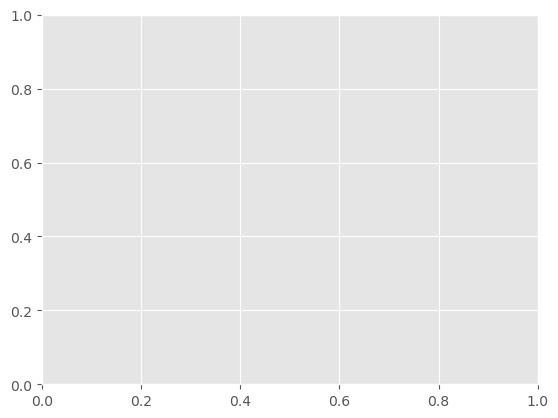

In [62]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots() 

# Call the show function to show the result
plt.show()

In [63]:
# load data

austin_weather = pd.read_csv("D:\Data Science\Data Sources\Data Camp/austin_weather.csv")
seattle_weather = pd.read_csv("D:\Data Science\Data Sources\Data Camp\seattle_weather.csv")

# first 12 months for seattle weather 
seattle_weather = seattle_weather.iloc[0:12,:]

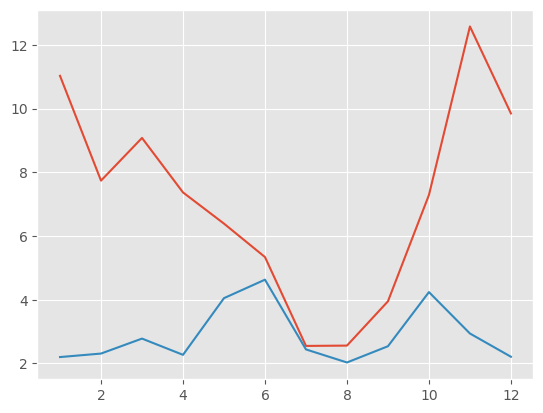

In [64]:
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])

plt.show()

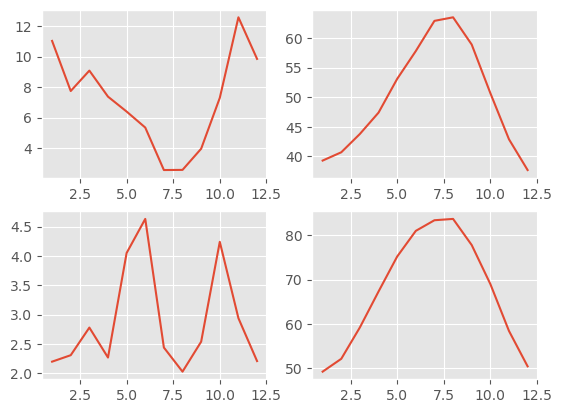

In [65]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots (2,2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0,0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0,1].plot(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'])

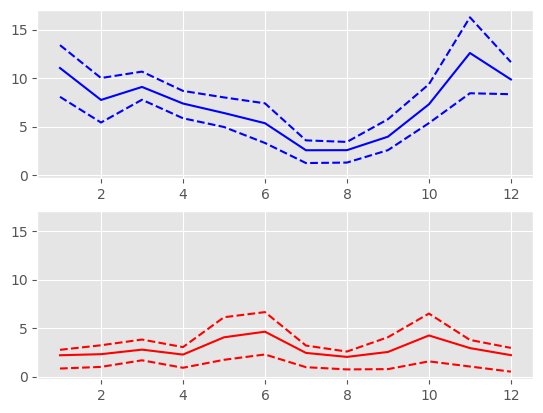

In [66]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['DATE'],austin_weather['MLY-PRCP-25PCTL'] , color = 'r', linestyle = '--')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')

plt.show()

In [67]:
# plotting Time series data

# Read the data from file using read_csv - set date col as index, parsing dates
climate_change = pd.read_csv("D:\Data Science\Data Sources\Data Camp\climate_change.csv", parse_dates = True, index_col= 'date')

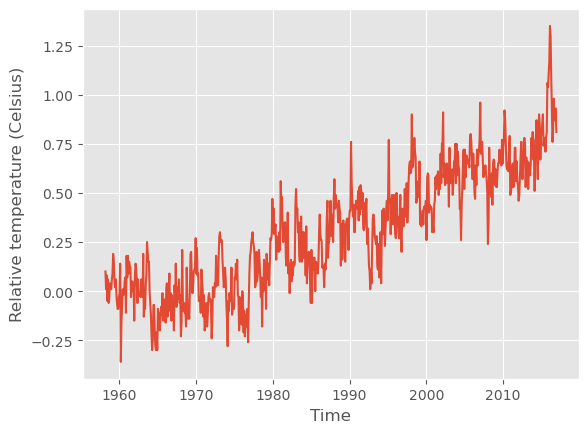

In [68]:
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot - set index as x variable
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

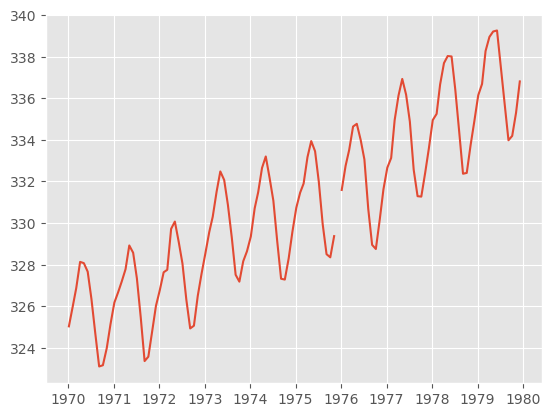

In [69]:
# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

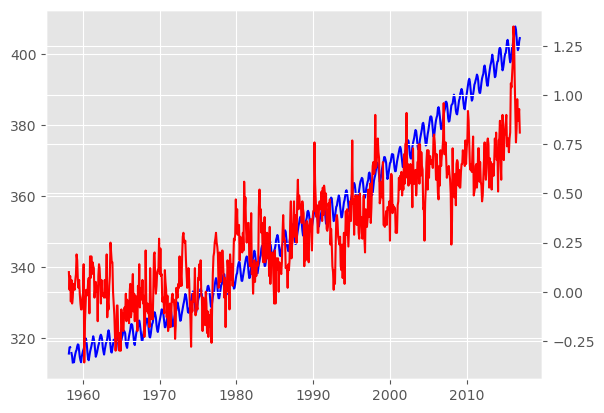

In [70]:
# plotting time series with different variables

# Initalize a Figure and Axes
fig,ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='red')

plt.show()

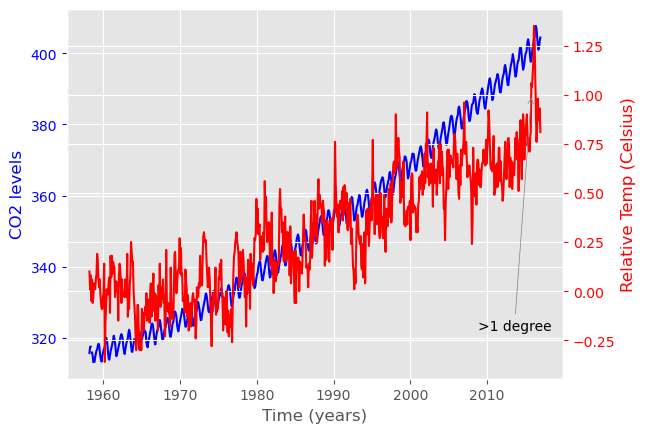

In [71]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", 'Time (years)', 'CO2 levels')

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", 'Time (years)', 'Relative Temp (Celsius)')

# annotating time-series
ax2.annotate('>1 degree', xy=[pd.Timestamp('2015-10-06'),1], xytext = (pd.Timestamp('2008-10-06'), -0.2), arrowprops = {'arrowstyle':'->','color':'gray'})

plt.show()

In [72]:
# Quantitative Comparisons: bar charts

#load data - set index to countries
medals = pd.read_csv("D:\Data Science\Data Sources\Data Camp\medals_by_country_2016.csv", index_col=0)

medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


C:\Users\leoco\AppData\Local\Temp\ipykernel_18000\204831795.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90)


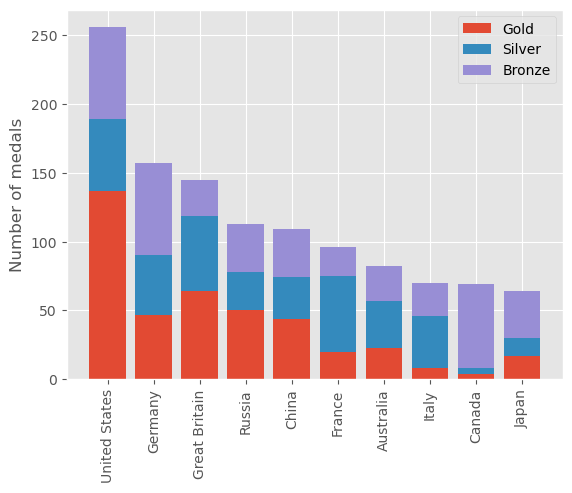

In [73]:
fig, ax = plt.subplots()

# plot gold medals by country
ax.bar(medals.index, medals['Gold'], label ='Gold')
ax.bar(medals.index, medals['Silver'], bottom = medals['Gold'], label = 'Silver')
ax.bar(medals.index, medals['Bronze'], bottom = medals['Gold'] + medals['Silver'], label = 'Bronze')

ax.set_xticklabels(medals.index, rotation = 90)
ax.set_ylabel('Number of medals')

ax.legend()
plt.show()

In [74]:
# creating histograms

# fig, ax = plt.subplots()

#ax.hist(x)

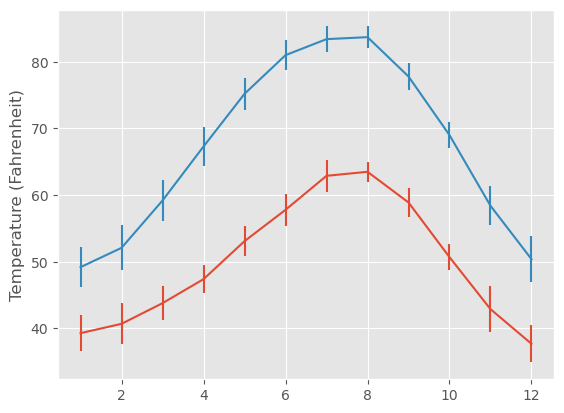

In [75]:
# adding errors bars to plots

fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'], seattle_weather['MLY-TAVG-STDDEV'])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'], austin_weather['MLY-TAVG-STDDEV'])

# Set the y-axis label
ax.set_ylabel('Temperature (Fahrenheit)')

plt.show()

# errors bars can also be added to bar charts - see filename chapter 3 in data camp for vizualization with matplotlib



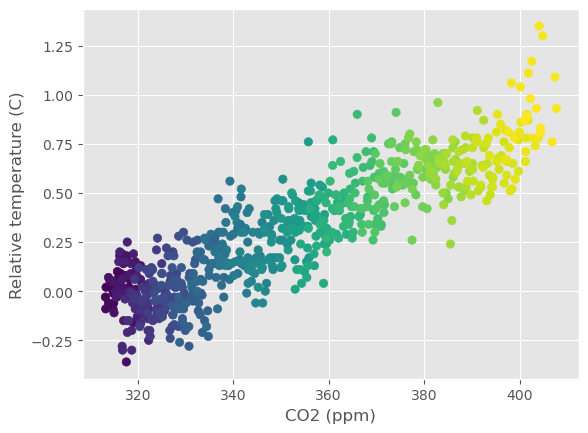

In [76]:
# statistical comparisons - scatter plots

fig, ax = plt.subplots()

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c = climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

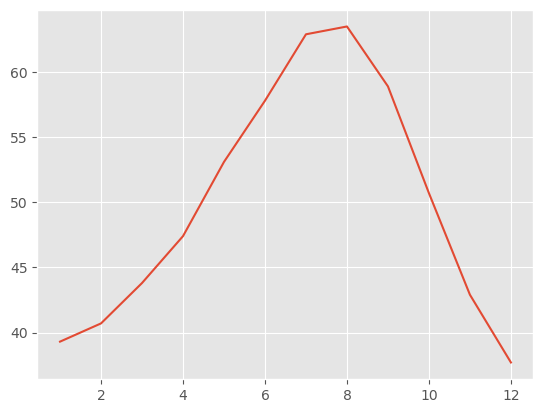

In [77]:
# different plot styles

# Use the "ggplot" style and create new Figure/Axes
fig, ax = plt.subplots()
plt.style.use('ggplot')
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

# saving a file

fig.savefig('my_figure.png')

# set dpi to 300
fig.savefig('my_figure_300dpi.png', dpi = 300)

# set size to 3 x 5
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


C:\Users\leoco\AppData\Local\Temp\ipykernel_18000\1140787522.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation=90)


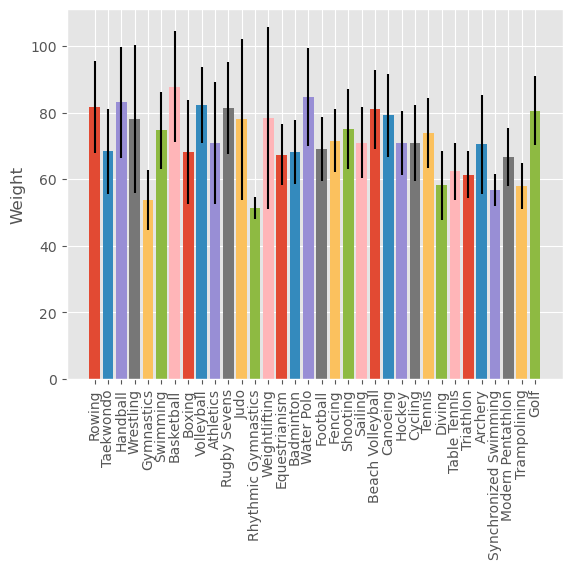

ValueError: not enough values to unpack (expected 2, got 1)

In [84]:
# automating figures from data

# load data

summer_2016_medals = pd.read_csv("D:\Data Science\Data Sources\Data Camp\summer2016.csv")

# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

# automate vizualization with loop

fig, ax = plt.subplots()

# Loop over the different sports branches of the sports variable
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport] # sports df == summer_medals_2016 unique sports

  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), # for every unique sport in the df, a bar will be created
                yerr = sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
plt.show()
fig.set_size_inches(['10,3'])
fig.savefig('sports_weight.png')